# Practicing Concepts in Convolutional Neural Networks (CNNs)

## **Code Examples: Applying CNN Concepts**

In this code session, we will explore a series of practical examples that demonstrate how the theoretical concepts you've learned are implemented in code. These examples are designed to showcase key components of Convolutional Neural Networks (CNNs), including:

1. **Understanding the Convolution Operation**: Learn how convolutional layers process input images to extract meaningful features.
2. **Exploring Filters/Kernels**: Experiment with different filters to see how they affect feature extraction.
3. **Implementing Pooling Layers**: Understand how pooling layers reduce spatial dimensions while retaining essential information.
4. **Combining Convolution, Pooling, Stride, and Fully Connected Layers**: Build a comprehensive CNN architecture by integrating various components.
5. **Image Classification**: Apply the learned concepts to perform image classification using the MNIST dataset.
6. **Discussion Questions**: questions to reflect about what you have learned.

Through these examples, you'll gain hands-on experience in building, training, and evaluating CNN models, bridging the gap between theory and practical application.

---


## **Table of Contents**

1. [Example 1: Understanding the Convolution Operation](#example-1-understanding-the-convolution-operation)
2. [Example 2: Exploring Filters/Kernels](#example-2-exploring-filterskernels)
3. [Example 3: Implementing Pooling Layers](#example-3-implementing-pooling-layers)
4. [Example 4: Combining Convolution, Pooling, Stride, and Fully Connected Layers](#example-4-combining-convolution-pooling-stride-and-fully-connected-layers)
5. [Example 5: Image Classification](#example-5-image-classification)
6. [Discussion Questions](#discussion-questions)


## Example 1: Understanding the Convolution Operation



Objective: Focus on the convolution operation by using two kernels of sizes 2x2 and 3x3. Apply both max pooling and average pooling to the convolution results. Visualize the resulting matrices with clear plots to understand how convolution and pooling transform the input image.



Steps:

- Create a sample grayscale image.
- Define two filters (kernels):
  - One of size 2x2.
  - Another of size 3x3.
- Perform convolution of the image with each kernel.
- Apply max pooling and average pooling to each convolution result.
- Visualize the original image, convolution results, and pooled outputs with appropriate plots.


In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d


### Step 1: Create a 10x10 matrix with black and white squares

In [2]:
# Step 1: Create a 10x10 matrix with black and white squares

# Function to create a checkerboard pattern
def create_checkerboard(size):
    """
    Create a checkerboard pattern of given size.
    Alternating black (0) and white (1) squares.

    Args:
        size (int): The size of the checkerboard (number of squares per side).

    Returns:
        np.ndarray: The checkerboard pattern as a 2D NumPy array.
    """
    # Generate a grid of indices, sum along the axes, and take modulo 2
    # This creates alternating 0s and 1s in a checkerboard pattern
    pattern = np.indices((size, size)).sum(axis=0) % 2
    return pattern

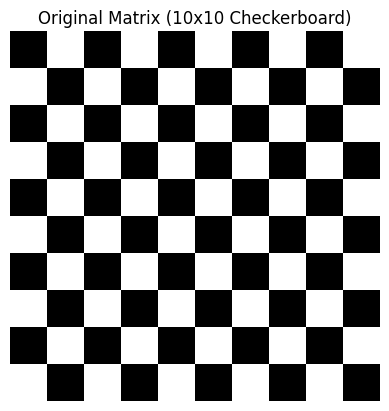

In [3]:
# Create the 10x10 checkerboard pattern
input_matrix = create_checkerboard(10)

# Display the original matrix
plt.imshow(input_matrix, cmap='gray', interpolation='nearest')
plt.title('Original Matrix (10x10 Checkerboard)')
plt.axis('off')
plt.show()


### Step 2: Define Averaging Kernels of Different Sizes


In [4]:
def create_averaging_kernel(size):
    """
    Create an averaging kernel of given size.

    Args:
        size (int): The size of the kernel.

    Returns:
        np.ndarray: The averaging kernel as a 2D NumPy array.
    """
    # The kernel is filled with ones, and then we divide by the total number of elements
    # So that the sum of all elements is 1 - it's like a gentle blur filter
    return np.ones((size, size), dtype=np.float32) / (size * size)


In [7]:

# Let's create some averaging kernels of various sizes
kernel_sizes = [2, 3, 4, 5]

# Create kernels
kernels = {size: create_averaging_kernel(size) for size in kernel_sizes}



### Step 3: Perform Convolution

In [8]:

# Dictionary to store convolved matrices
convolved_matrices = {}

# Apply convolution with each kernel
for size, kernel in kernels.items():
    # Perform convolution without padding ('valid' convolution)
    # 'Valid' mode means we only compute where the kernel fully overlaps the input
    # This will result in smaller output matrices
    convolved = convolve2d(input_matrix, kernel, mode='valid')
    convolved_matrices[size] = convolved


### Step 4: Visualize the Original and Convolved Matrices


In [9]:
# Number of subplots: original + number of kernels
num_plots = len(kernel_sizes) + 1


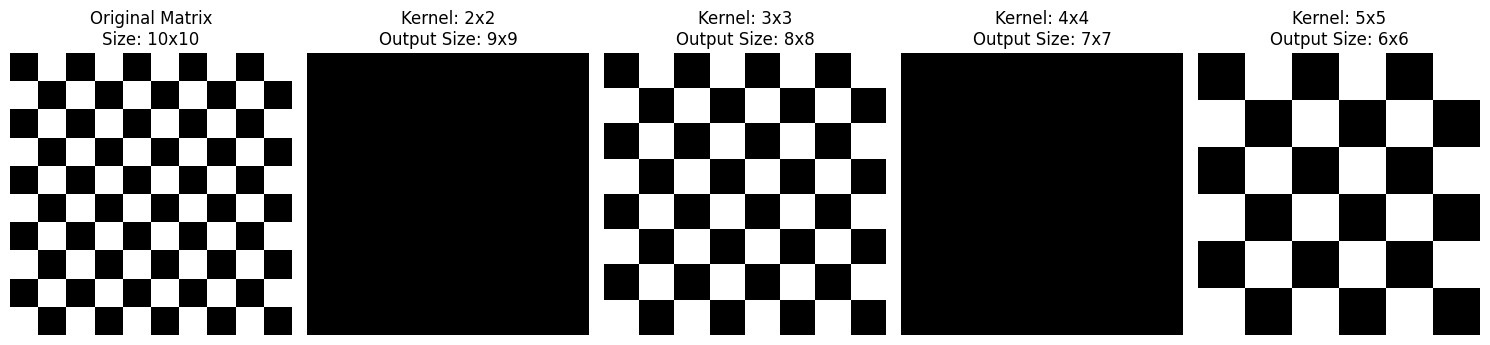

In [10]:
plt.figure(figsize=(15, 5))

# Plot the original matrix
plt.subplot(1, num_plots, 1)
plt.imshow(input_matrix, cmap='gray', interpolation='nearest')
plt.title('Original Matrix\nSize: {}x{}'.format(input_matrix.shape[1], input_matrix.shape[0]))
plt.axis('off')

# Plot the convolved matrices
for i, size in enumerate(kernel_sizes, start=2):
    convolved = convolved_matrices[size]
    plt.subplot(1, num_plots, i)
    plt.imshow(convolved, cmap='gray', interpolation='nearest')
    plt.title('Kernel: {}x{}\nOutput Size: {}x{}'.format(
        size, size, convolved.shape[1], convolved.shape[0]))
    plt.axis('off')

    # Let's see how our checkerboard looks after being convolved with a {}x{} kernel
    # The larger the kernel, the blurrier the image gets!

plt.tight_layout()
plt.show()


<hr style="border: none; height: 2px; background-color: #e0e0e0; margin: 40px 0;">

<br>
<br>
<br>

## Example 2: Exploring Filters/Kernels

In this example, we'll apply averaging kernels of varying sizes to an image of a cat's face. We'll observe how kernel size affects both the content and dimensions of the output image, especially when not using padding.



In [1]:
import cv2  # OpenCV library for image processing


### Step 1: Load a Smaller Image

In [2]:
# Read the image
image = cv2.imread('/content/nixy.webp')


In [23]:
# Resize the image for faster processing
image = cv2.resize(image, (256, 256))


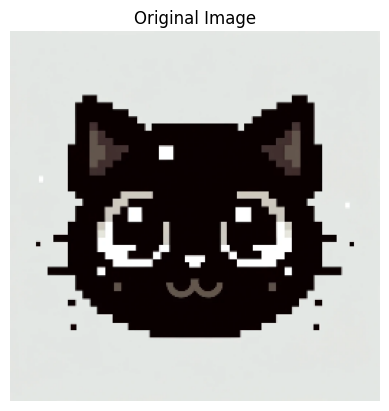

In [24]:
# Display the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

### Step 2: Define Averaging Kernels of Different Sizes


In [15]:

def create_averaging_kernel(size):
    """
    Create an averaging kernel of given size.

    Args:
        size (int): The size of the kernel.

    Returns:
        np.ndarray: The averaging kernel as a 2D NumPy array.
    """
    # A kernel filled with ones, normalized by dividing by the total number of elements
    return np.ones((size, size), dtype=np.float32) / (size * size)


In [17]:
# Define kernel sizes
kernel_sizes = [2, 10, 30, 100]

# Create kernels
kernels = {size: create_averaging_kernel(size) for size in kernel_sizes}


### Step 3: Perform Convolution Without Padding (Valid Convolution)


In [18]:


# Dictionary to store convolved images
convolved_images = {}

for size, kernel in kernels.items():
    # Perform convolution
    convolved = cv2.filter2D(src=image, ddepth=-1, kernel=kernel, borderType=cv2.BORDER_CONSTANT)
    # Calculate valid output size
    valid_size = image.shape[0] - size + 1
    # Crop the image to valid size (no padding)
    convolved = convolved[:valid_size, :valid_size]
    convolved_images[size] = convolved


### Step 4: Visualize the Original and Convolved Images with Their Sizes


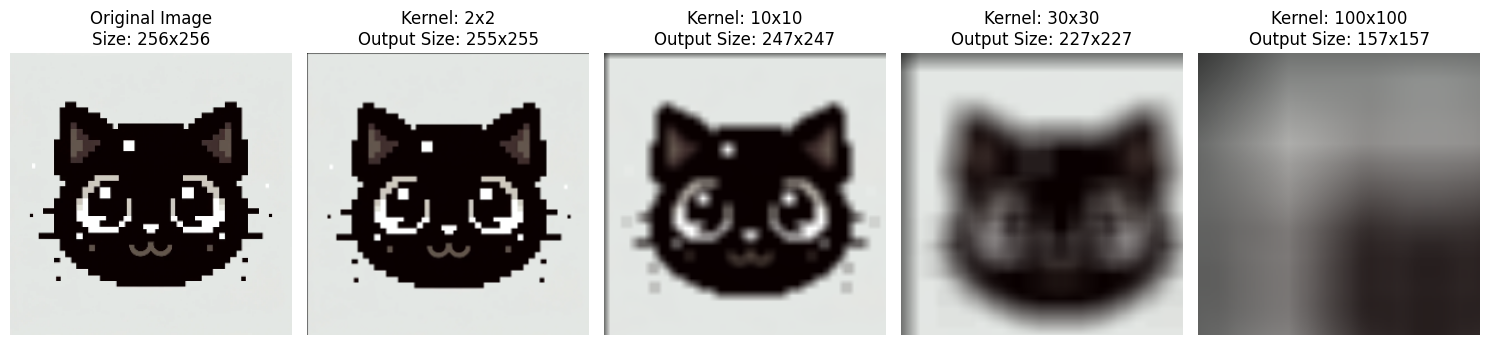

In [19]:
plt.figure(figsize=(15, 8))

# Display the original image
plt.subplot(1, len(kernel_sizes) + 1, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image\nSize: {}x{}'.format(image.shape[1], image.shape[0]))
plt.axis('off')

# Display the convolved images
for i, size in enumerate(kernel_sizes, start=2):
    convolved_image = convolved_images[size]
    plt.subplot(1, len(kernel_sizes) + 1, i)
    plt.imshow(convolved_image, cmap='gray')
    plt.title('Kernel: {}x{}\nOutput Size: {}x{}'.format(
        size, size, convolved_image.shape[1], convolved_image.shape[0]))
    plt.axis('off')

    # The cat is getting blurrier and smaller!
    # See how increasing the kernel size affects the image.

plt.tight_layout()
plt.show()

Feel free to experiment with different kernel sizes, images, or even create your own kernels to see how they affect the convolution operation. Happy coding! 🐱‍👓

<hr style="border: none; height: 2px; background-color: #e0e0e0; margin: 40px 0;">

Now lets explore different kind of kernels.


### Step 1: display the original image. It is important to have the reference and look at it again.

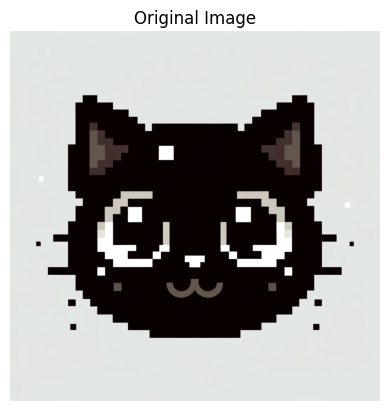

In [5]:
# Display the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


### Step 2: define the kernels to explore.

In [6]:
# Step 2: Define Various Kernels (Filters)

# Identity Kernel (does nothing but looks important)
identity_kernel = np.array([[0, 0, 0],
                            [0, 1, 0],
                            [0, 0, 0]], dtype=np.float32)

# Sharpening Kernel (makes the image pop!)
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]], dtype=np.float32)

# Edge Detection Kernel (Sobel operator)
edge_kernel = np.array([[-1, -1, -1],
                        [-1, 8, -1],
                        [-1, -1, -1]], dtype=np.float32)

# Blurring Kernel (for when the cat needs to be incognito)
blurring_kernel = (1/9) * np.ones((3, 3), dtype=np.float32)

# Let's put all these kernels in a dictionary for easy access
kernels = {
    'Identity': identity_kernel,
    'Sharpening': sharpening_kernel,
    'Edge Detection': edge_kernel,
    'Blurring': blurring_kernel
}


### Step 3: Apply Convolution with Each Kernel

In [7]:
def apply_convolution(image, kernel):
    """
    Apply convolution to an image using the given kernel.

    Args:
        image (np.ndarray): The input image.
        kernel (np.ndarray): The convolution kernel.

    Returns:
        np.ndarray: The convolved image.
    """
    # Using OpenCV's filter2D function to apply the kernel
    return cv2.filter2D(src=image, ddepth=-1, kernel=kernel, borderType=cv2.BORDER_CONSTANT)

# Dictionary to store convolved images
convolved_images = {}

for name, kernel in kernels.items():
    convolved = apply_convolution(image, kernel)
    convolved_images[name] = convolved


### Step 4: Visualize the Original and Convolved Images

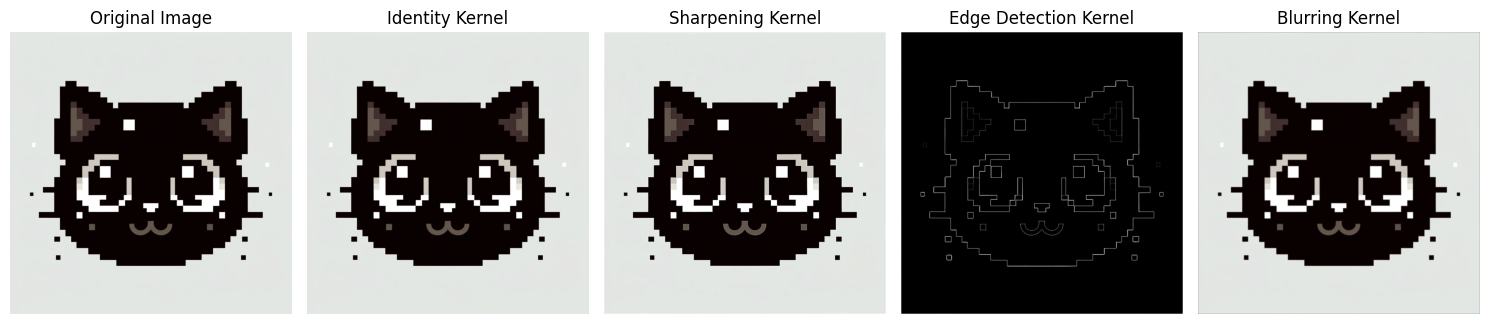

In [8]:
#  Each kernel gives our feline friend a new look!
# Number of subplots: original + number of kernels
num_plots = len(kernels) + 1

plt.figure(figsize=(15, 8))

# Display the original image
plt.subplot(1, num_plots, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display the convolved images
for i, (name, convolved_image) in enumerate(convolved_images.items(), start=2):
    plt.subplot(1, num_plots, i)
    plt.imshow(convolved_image, cmap='gray')
    plt.title(f'{name} Kernel')
    plt.axis('off')

    # Each filter unveils a different side of our cat's personality!

plt.tight_layout()
plt.show()


Explanation:

Step 1: We start by loading a grayscale image of a cat's face. Grayscale simplifies the computation and helps focus on the effect of the kernels.

Step 2: We define several kernels:

Identity Kernel: Leaves the image unchanged. It's like saying "You're perfect just the way you are" to the cat.

Sharpening Kernel: Enhances edges and fine details, making the image appear crisper.

Edge Detection Kernel: Highlights areas with significant intensity changes, effectively detecting edges.

Blurring Kernel: Smooths the image by averaging neighboring pixels, useful for reducing noise or hiding the cat's identity (spy cat!).

Step 3: We apply convolution to the image using each kernel. The apply_convolution function uses OpenCV's filter2D method. This function convolves the kernel over the image and handles the borders with a constant value (zero).

Step 4: We visualize the original and convolved images side by side:

Original Image: Shows the cat in its natural, unfiltered state.

Identity Kernel: The image remains the same, confirming that our convolution process is correctly implemented.

Sharpening Kernel: The image appears sharper, with enhanced edges and details. The cat looks ready for a high-definition close-up!

Edge Detection Kernel: The image displays the edges of the cat's face, highlighting contours and transitions. It's like turning the cat into a sketch.

Blurring Kernel: The image appears softer and smoother. The cat looks dreamy, as if viewed through a soft-focus lens.

Key Takeaways:

Different Kernels, Different Effects: Each kernel extracts or emphasizes different features from the image. This illustrates how convolutional layers in neural networks can learn various filters to detect edges, textures, and other patterns.

Convolution is Versatile: By changing the kernel, we can achieve a wide range of effects, from sharpening to blurring to edge detection.

Visualization Helps Understanding: Seeing the results side by side makes it easier to understand the impact of each kernel.

Fun Observations:

The Identity Kernel is the Cat's Best Friend: It keeps the image unchanged, just like a loyal companion.

Sharpening Makes the Cat Look Fierce: The details pop, and the cat looks ready to pounce.

Edge Detection Turns the Cat into Art: It's like a pencil sketch or a stencil—perfect for your next DIY project.

Blurring Makes the Cat Look Mystical: The soft edges give the image a dreamy quality, as if the cat is appearing in a vision.

Next Steps:

Experiment with Custom Kernels: Try creating your own kernels to see what effects you can achieve. For example, embossing or custom edge detectors.

Apply to Different Images: Use images with different subjects or textures to see how the kernels perform.

Combine Kernels: Apply multiple kernels in sequence to create compound effects.

Additional Notes:

Edge Handling: We used borderType=cv2.BORDER_CONSTANT to handle the edges by padding with zeros. You can experiment with other border types like cv2.BORDER_REFLECT or cv2.BORDER_REPLICATE.

Kernel Normalization: Ensure that the sum of the kernel elements is appropriate for the desired effect. For example, the blurring kernel sums to 1, preserving the overall brightness.

Color Images: For color images, you would need to apply the convolution to each color channel separately.

Happy Filtering! Remember, with great power (of convolution), comes great responsibility (to not overfilter your cat).

<hr style="border: none; height: 2px; background-color: #e0e0e0; margin: 40px 0;">

<br>
<br>
<br>

## Example 3: Implementing Pooling Layers



Example 3: Implementing Pooling Layers
In this example, we'll explore how pooling layers work by implementing max pooling and average pooling on an image. Pooling layers reduce the spatial dimensions (height and width) of the input volume for the next layers, which helps in reducing computational complexity and controlling overfitting.

We'll apply both types of pooling to an image of a cat (yes, our feline friend is back!) and visualize the results to understand how pooling affects the image.

### Step 1: display the origina image

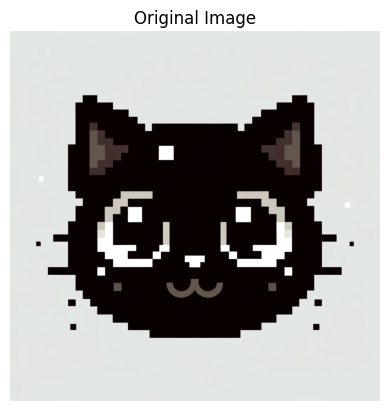

In [9]:
# Display the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


### Step 2: Define Pooling Functions

In [10]:
def max_pooling(image, pool_size, stride):
    """
    Apply max pooling to the input image.

    Args:
        image (np.ndarray): The input image.
        pool_size (int): The size of the pooling window.
        stride (int): The stride with which the pooling window moves.

    Returns:
        np.ndarray: The pooled image.
    """
    # Calculate output dimensions
    output_height = ((image.shape[0] - pool_size) // stride) + 1
    output_width = ((image.shape[1] - pool_size) // stride) + 1

    # Initialize the output matrix
    pooled_image = np.zeros((output_height, output_width), dtype=np.float32)

    # Perform max pooling
    for y in range(0, image.shape[0] - pool_size + 1, stride):
        for x in range(0, image.shape[1] - pool_size + 1, stride):
            window = image[y:y+pool_size, x:x+pool_size]
            pooled_image[y // stride, x // stride] = np.max(window)

    return pooled_image


def average_pooling(image, pool_size, stride):
    """
    Apply average pooling to the input image.

    Args:
        image (np.ndarray): The input image.
        pool_size (int): The size of the pooling window.
        stride (int): The stride with which the pooling window moves.

    Returns:
        np.ndarray: The pooled image.
    """
    # Calculate output dimensions
    output_height = ((image.shape[0] - pool_size) // stride) + 1
    output_width = ((image.shape[1] - pool_size) // stride) + 1

    # Initialize the output matrix
    pooled_image = np.zeros((output_height, output_width), dtype=np.float32)

    # Perform average pooling
    for y in range(0, image.shape[0] - pool_size + 1, stride):
        for x in range(0, image.shape[1] - pool_size + 1, stride):
            window = image[y:y+pool_size, x:x+pool_size]
            pooled_image[y // stride, x // stride] = np.mean(window)

    return pooled_image


### Step 3: Apply Pooling to the Image

In [11]:

# Set pooling parameters
pool_size = 2  # Size of the pooling window (e.g., 2x2)
stride = 2     # Stride with which the window moves

# Apply max pooling
max_pooled_image = max_pooling(image, pool_size, stride)

# Apply average pooling
avg_pooled_image = average_pooling(image, pool_size, stride)


### Step 4: Visualize the Original and Pooled Images

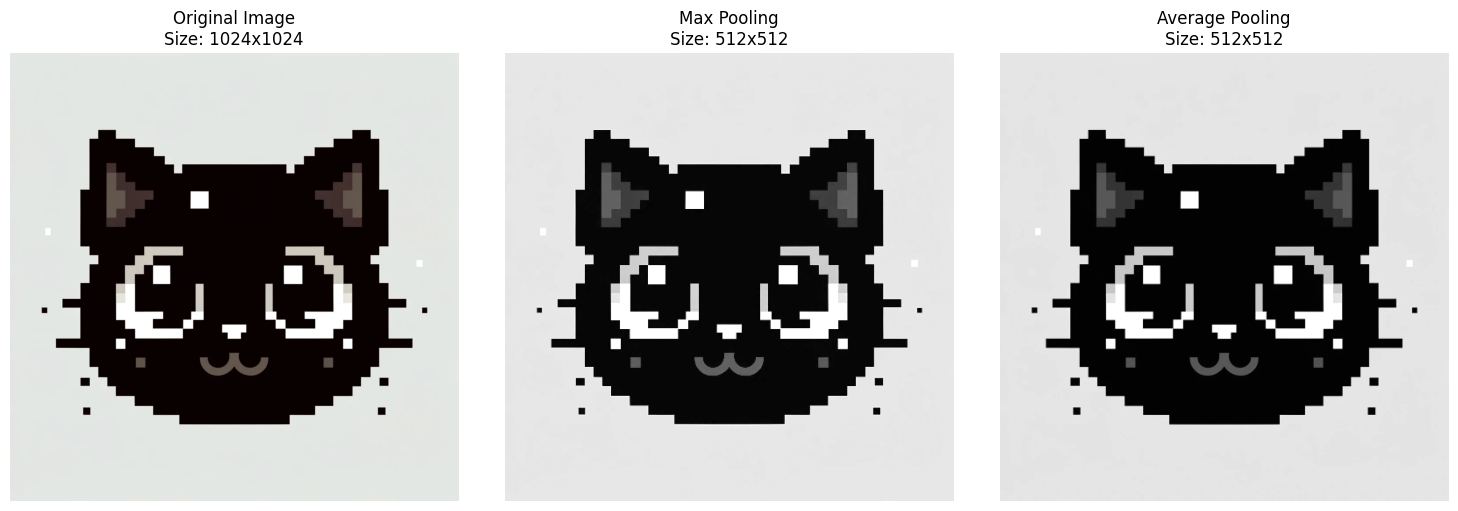

In [12]:

plt.figure(figsize=(15, 5))

# Display the original image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image\nSize: {}x{}'.format(image.shape[1], image.shape[0]))
plt.axis('off')

# Display the max pooled image
plt.subplot(1, 3, 2)
plt.imshow(max_pooled_image, cmap='gray')
plt.title('Max Pooling\nSize: {}x{}'.format(max_pooled_image.shape[1], max_pooled_image.shape[0]))
plt.axis('off')

# Display the average pooled image
plt.subplot(1, 3, 3)
plt.imshow(avg_pooled_image, cmap='gray')
plt.title('Average Pooling\nSize: {}x{}'.format(avg_pooled_image.shape[1], avg_pooled_image.shape[0]))
plt.axis('off')

plt.tight_layout()
plt.show()


Explanation:

Step 1: We load the same grayscale image of a cat and resize it to 256x256 pixels. This size is manageable for our pooling operations.

Step 2: We define two functions, max_pooling and average_pooling, which manually implement the pooling operations:

Max Pooling:
Divides the image into non-overlapping regions of size pool_size x pool_size.
Takes the maximum value from each region.
Reduces the spatial dimensions of the image.
Average Pooling:
Similar to max pooling but takes the average value from each region.
Also reduces the spatial dimensions.
Step 3: We set the pooling window size to 2x2 and the stride to 2, meaning the window moves 2 pixels at a time, covering the image without overlapping.

Apply Max Pooling: We call max_pooling on the image.
Apply Average Pooling: We call average_pooling on the image.
Step 4: We visualize the original image and the two pooled images side by side:

Original Image:
Size: 256x256 pixels.
Displays the cat in full detail.
Max Pooled Image:
Size: 128x128 pixels (since we used a pool size and stride of 2).
The image retains the most prominent features from each pooling window.
Appears slightly reduced in detail but preserves edges and textures better than average pooling.
Average Pooled Image:
Size: 128x128 pixels.
The image appears more blurred compared to the max pooled image.
Fine details are smoothed out due to averaging.
Key Takeaways:

Pooling Reduces Dimensions: Both max and average pooling reduce the spatial dimensions of the input, which helps in reducing computation and controlling overfitting.

Max vs. Average Pooling:

Max Pooling:
Captures the most prominent features.
Helps in preserving edges and textures.
Average Pooling:
Computes the average, leading to a smoother, more blurred output.
May lose some sharpness and fine details.
Stride and Pool Size Matter:

The choice of pool size and stride affects how much the image is downsampled.
A larger pool size or stride results in a smaller output image.
Fun Observations:

Max Pooling is Like Picking Favorites:

It selects the brightest (or most intense) pixel in each region, much like how a cat chooses its favorite napping spot.
Average Pooling is About Fairness:

It treats every pixel equally within the pooling window, averaging their values. Perhaps like sharing the attention among multiple pets!
Next Steps:

Experiment with Different Pool Sizes and Strides:

Try changing pool_size and stride to see how they affect the output.
For example, set pool_size = 4 and stride = 4 to downsample the image even more.
Apply Pooling to Feature Maps:

In a real CNN, pooling is applied to feature maps obtained after convolution.
You can combine this example with previous ones to perform convolution followed by pooling.
Use Built-in Functions:

While we implemented pooling manually, libraries like TensorFlow and PyTorch provide optimized functions.
You can explore using these libraries for more advanced applications.
Additional Notes:

Edge Handling:

In this example, we assume the input dimensions are divisible by the pool size for simplicity.
In practice, you may need to handle cases where the pooling window doesn't fit perfectly at the edges.
Why Pooling?

Pooling helps make the representation approximately invariant to small translations of the input.
It reduces the number of parameters and computations in the network.
Happy Pooling! Remember, just like a cat lounging in its favorite spot, pooling layers help your neural network relax and focus on the most important features.



<hr style="border: none; height: 2px; background-color: #e0e0e0; margin: 40px 0;">

<br>
<br>
<br>

## Example 4: Combining Convolution, Pooling, Stride, and Fully Connected Layers

### Step 1: Normalize the input image

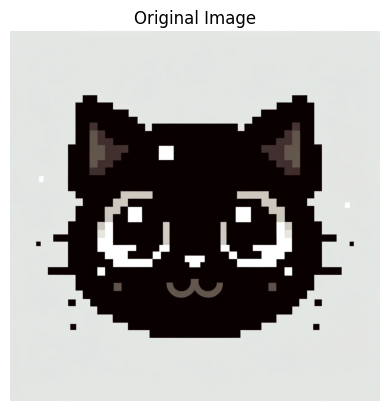

Final image shape: (1024, 1024, 3)


In [13]:
# Normalize the image to have pixel values between 0 and 1
image_normalized = image / 255.0

# Display the original image
plt.imshow(image_normalized)
plt.title('Original Image')
plt.axis('off')
plt.show()

print("Final image shape:", image_normalized.shape)

### Step 2: Define the feature extraction functions and kernels

In [14]:
def manual_convolution_color(image, kernel, stride):
    """
    Perform convolution on a color image using a given kernel and stride.

    Args:
        image (np.ndarray): Color input image with shape (height, width, channels).
        kernel (np.ndarray): Convolution kernel with shape (k_height, k_width).
        stride (int): Stride for convolution.

    Returns:
        np.ndarray: Convolved image with shape (output_height, output_width, channels).
    """
    kernel_height, kernel_width = kernel.shape
    image_height, image_width, channels = image.shape

    # Calculate output dimensions
    output_height = ((image_height - kernel_height) // stride) + 1
    output_width = ((image_width - kernel_width) // stride) + 1

    # Initialize the output image
    output = np.zeros((output_height, output_width, channels))

    # Perform convolution on each channel
    for c in range(channels):
        for y in range(output_height):
            for x in range(output_width):
                y_start = y * stride
                y_end = y_start + kernel_height
                x_start = x * stride
                x_end = x_start + kernel_width

                region = image[y_start:y_end, x_start:x_end, c]
                output[y, x, c] = np.sum(region * kernel)

    return output


In [15]:
def manual_pooling_color(image, pool_size, stride, mode='max'):
    """
    Perform pooling on a color image using a given pool size and stride.

    Args:
        image (np.ndarray): Input image with shape (height, width, channels).
        pool_size (int): Size of the pooling window.
        stride (int): Stride for pooling.
        mode (str): 'max' for max pooling, 'average' for average pooling.

    Returns:
        np.ndarray: Pooled image with shape (output_height, output_width, channels).
    """
    image_height, image_width, channels = image.shape

    # Calculate output dimensions
    output_height = ((image_height - pool_size) // stride) + 1
    output_width = ((image_width - pool_size) // stride) + 1

    # Initialize the output image
    output = np.zeros((output_height, output_width, channels))

    # Perform pooling on each channel
    for c in range(channels):
        for y in range(output_height):
            for x in range(output_width):
                y_start = y * stride
                y_end = y_start + pool_size
                x_start = x * stride
                x_end = x_start + pool_size

                region = image[y_start:y_end, x_start:x_end, c]
                if mode == 'max':
                    output[y, x, c] = np.max(region)
                elif mode == 'average':
                    output[y, x, c] = np.mean(region)

    return output


In [16]:
# Define a simple convolution kernel (e.g., edge detection)
kernel_1 = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

# For the second convolution, we'll use a blurring kernel
kernel_2 = np.ones((3, 3)) / 9.0


### Step 3:  Apply and visualize the first operation (layer)

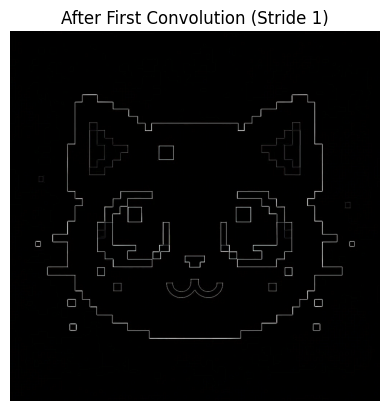

After First Convolution shape: (1022, 1022, 3)


In [17]:
# Apply first convolution with stride 1
conv1_output = manual_convolution_color(image_normalized, kernel_1, stride=1)

# Apply ReLU activation (set negative values to zero)
conv1_output = np.maximum(conv1_output, 0)

# Clip values to [0, 1] range after ReLU
conv1_output = np.clip(conv1_output, 0, 1)

# Visualize the output
plt.imshow(conv1_output)
plt.title('After First Convolution (Stride 1)')
plt.axis('off')
plt.show()

print("After First Convolution shape:", conv1_output.shape)


### Step 4: Apply and visualize the second operation (layer)

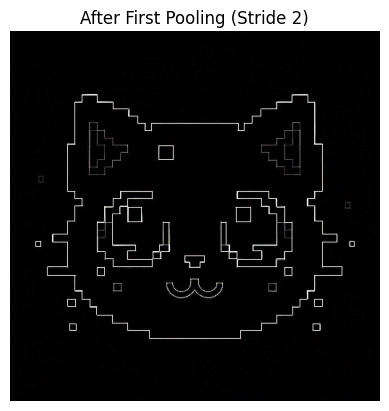

After First Pooling shape: (511, 511, 3)


In [18]:
# Apply first pooling with pool size 2 and stride 2
pool1_output = manual_pooling_color(conv1_output, pool_size=2, stride=2, mode='max')

# Visualize the output
plt.imshow(pool1_output)
plt.title('After First Pooling (Stride 2)')
plt.axis('off')
plt.show()

print("After First Pooling shape:", pool1_output.shape)


### Step 5: Apply the for the second time the previous operations

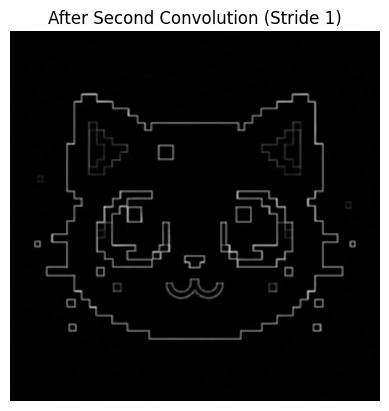

After Second Convolution shape: (509, 509, 3)


In [19]:
# Apply second convolution with stride 1
conv2_output = manual_convolution_color(pool1_output, kernel_2, stride=1)

# Apply ReLU activation
conv2_output = np.maximum(conv2_output, 0)

# Clip values to [0, 1] range
conv2_output = np.clip(conv2_output, 0, 1)

# Visualize the output
plt.imshow(conv2_output)
plt.title('After Second Convolution (Stride 1)')
plt.axis('off')
plt.show()

print("After Second Convolution shape:", conv2_output.shape)


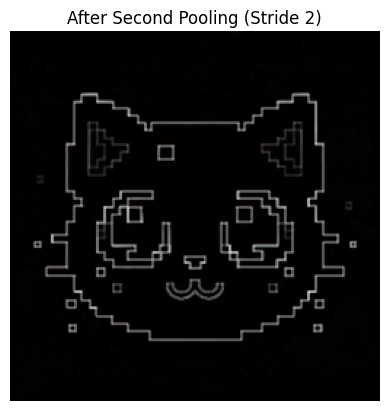

After Second Pooling shape: (254, 254, 3)


In [20]:
# Apply second pooling with pool size 2 and stride 2
pool2_output = manual_pooling_color(conv2_output, pool_size=2, stride=2, mode='max')

# Visualize the output
plt.imshow(pool2_output)
plt.title('After Second Pooling (Stride 2)')
plt.axis('off')
plt.show()

print("After Second Pooling shape:", pool2_output.shape)


### Step 6: Flatten the image to a vector

In [21]:
# Flatten the output to imitate a fully connected layer input
flattened_output = pool2_output.flatten()

print("Flattened Output shape:", flattened_output.shape)
print("First 10 elements of the flattened output:", flattened_output[:10])


Flattened Output shape: (193548,)
First 10 elements of the flattened output: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Step 7: Simulate passing through a fully connected layer

In [31]:

# Define weights and bias for the fully connected layer
# For example, connecting flattened_output to a layer with 64 neurons

# Initialize weights and bias randomly
# Note: In a real scenario, these would be learned parameters
fc_weights = np.random.rand(flattened_output.shape[0], 64)  # Shape: (flattened_size, 64)
fc_bias = np.random.rand(64)  # Shape: (64,)


In [32]:

# Compute the fully connected layer output
fc_output = np.dot(flattened_output, fc_weights) + fc_bias

print("Fully Connected Layer Output shape:", fc_output.shape)
print("First 10 elements of the FC layer output:", fc_output[:10])


Fully Connected Layer Output shape: (64,)
First 10 elements of the FC layer output: [2771.46872048 2781.92998417 2768.7409668  2776.43468623 2800.59386976
 2792.5926102  2782.93348867 2781.79610376 2799.62916305 2818.34852671]


### Step 8: Repeat previous steps for the stride 1 example now with stride 3

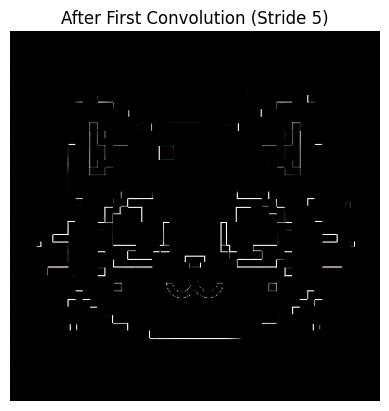

After First Convolution (Stride 5) shape: (341, 341, 3)


In [28]:
# Apply first convolution with stride 3
conv1_output_s3 = manual_convolution_color(image_normalized, kernel_1, stride=3)

# Apply ReLU activation
conv1_output_s3 = np.maximum(conv1_output_s3, 0)

# Clip values to [0, 1] range
conv1_output_s3 = np.clip(conv1_output_s3, 0, 1)

# Visualize the output
plt.imshow(conv1_output_s3)
plt.title('After First Convolution (Stride 5)')
plt.axis('off')
plt.show()

print("After First Convolution (Stride 5) shape:", conv1_output_s3.shape)


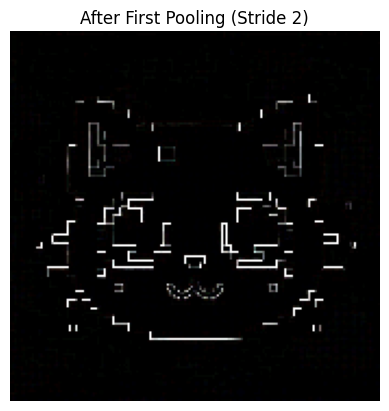

After First Pooling shape: (170, 170, 3)


In [29]:
# Apply first pooling with pool size 2 and stride 2
pool1_output_s3 = manual_pooling_color(conv1_output_s3, pool_size=2, stride=2, mode='max')

# Visualize the output
plt.imshow(pool1_output_s3)
plt.title('After First Pooling (Stride 2)')
plt.axis('off')
plt.show()

print("After First Pooling shape:", pool1_output_s3.shape)


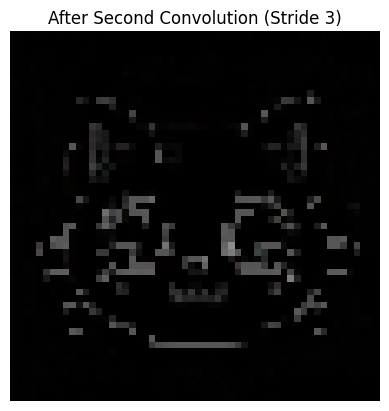

After Second Convolution (Stride 3) shape: (56, 56, 3)


In [24]:
# Apply second convolution with stride 3
conv2_output_s3 = manual_convolution_color(pool1_output_s3, kernel_2, stride=3)

# Apply ReLU activation
conv2_output_s3 = np.maximum(conv2_output_s3, 0)

# Clip values to [0, 1] range
conv2_output_s3 = np.clip(conv2_output_s3, 0, 1)

# Visualize the output
plt.imshow(conv2_output_s3)
plt.title('After Second Convolution (Stride 3)')
plt.axis('off')
plt.show()

print("After Second Convolution (Stride 3) shape:", conv2_output_s3.shape)


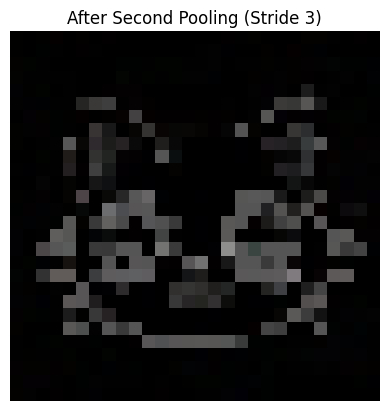

After Second Pooling shape: (28, 28, 3)


In [25]:
# Apply second pooling with pool size 2 and stride 2
pool2_output_s3 = manual_pooling_color(conv2_output_s3, pool_size=2, stride=2, mode='max')

# Visualize the output
plt.imshow(pool2_output_s3)
plt.title('After Second Pooling (Stride 3)')
plt.axis('off')
plt.show()

print("After Second Pooling shape:", pool2_output_s3.shape)


In [26]:
# Flatten the output to imitate a fully connected layer input
flattened_output_s3 = pool2_output_s3.flatten()

print("Flattened Output shape:", flattened_output_s3.shape)
print("First 10 elements of the flattened output:", flattened_output_s3[:10])


Flattened Output shape: (2352,)
First 10 elements of the flattened output: [0.00522876 0.00784314 0.         0.         0.         0.
 0.00522876 0.0043573  0.00261438 0.01742919]


In [36]:

# Initialize weights and bias randomly
fc_weights_s3 = np.random.rand(flattened_output_s3.shape[0], 64)  # Shape: (flattened_size, 64)
fc_bias_s3 = np.random.rand(64)  # Shape: (64,)


In [38]:

# Compute the fully connected layer output
fc_output_s3 = np.dot(flattened_output_s3, fc_weights_s3) + fc_bias_s3

print("Fully Connected Layer Output shape Stride 3:", fc_output_s3.shape)
print("First 10 elements of the FC layer output Stride 3:", fc_output_s3[:10])


Fully Connected Layer Output shape Stride 3: (64,)
First 10 elements of the FC layer output Stride 3: [72.13113796 71.48733707 68.89277663 70.90651556 76.02489349 73.82453117
 73.24438866 69.76010758 72.30129284 70.37683663]


### Step 9: Visualize the final images before flattening

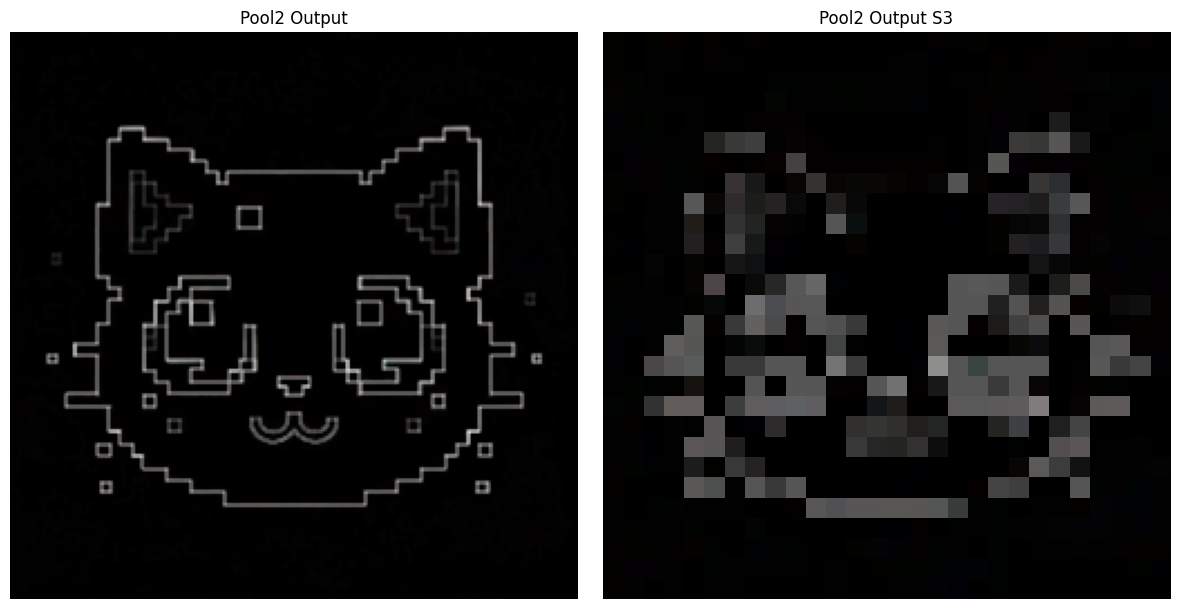

In [30]:
import matplotlib.pyplot as plt

# Assuming pool2_output and pool2_output_s3 are already defined and are 2D or 3D numpy arrays
# If they are multi-channel (e.g., RGB), ensure to handle accordingly

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the first image
axes[0].imshow(pool2_output, cmap='gray')  # Use 'gray' for single-channel images
axes[0].set_title('Pool2 Output')
axes[0].axis('off')  # Hide axis ticks

# Display the second image
axes[1].imshow(pool2_output_s3, cmap='gray')  # Use 'gray' for single-channel images
axes[1].set_title('Pool2 Output S3')
axes[1].axis('off')  # Hide axis ticks

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


## Example 5: Image Classification

### **Dataset Introduction: MNIST Binary Classification**

**MNIST** (Modified National Institute of Standards and Technology) is a fundamental dataset in machine learning, consisting of **70,000 grayscale images** of handwritten digits (0-9), each sized **28x28 pixels**. For this lab, we'll focus on a **binary classification** task by selecting only two classes: **'0'** and **'1'**, resulting in **5,000 images** for each class.

### **Why MNIST for Binary Classification?**

- **Simplicity:** Clear and well-centered digits make it ideal for beginners.
- **Balanced Dataset:** Equal representation of both classes ensures unbiased training.
- **Benchmarking:** A standard dataset for evaluating machine learning models.



In [39]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd


### Step 1: Load the MNIST Dataset

In [40]:
# Load data
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### Step 2: Filter the Dataset for '0' and '1' Classes

In [41]:
# Create boolean masks for '0' and '1'
train_mask = np.isin(train_labels, [0, 1]).flatten()
test_mask = np.isin(test_labels, [0, 1]).flatten()


In [42]:
# Apply the masks to filter the data
train_images_filtered = train_images[train_mask]
train_labels_filtered = train_labels[train_mask]
test_images_filtered = test_images[test_mask]
test_labels_filtered = test_labels[test_mask]


In [43]:
# Convert labels from [0,1] to [0,1] for binary classification (no change needed)
# But ensure labels are in float format
train_labels_binary = train_labels_filtered.astype('float32')
test_labels_binary = test_labels_filtered.astype('float32')


In [44]:
print(f"Training data shape: {train_images_filtered.shape}")
print(f"Training labels shape: {train_labels_binary.shape}")
print(f"Testing data shape: {test_images_filtered.shape}")
print(f"Testing labels shape: {test_labels_binary.shape}")


Training data shape: (12665, 28, 28)
Training labels shape: (12665,)
Testing data shape: (2115, 28, 28)
Testing labels shape: (2115,)


In [45]:
# Define Class Names for Binary Classification
binary_class_names = ['0', '1']


In [46]:
# Define a function to plot sample images
def plot_sample_images(images, labels, class_names, num_samples=10):
    """
    Plots a grid of sample images with their corresponding labels.

    Args:
        images (np.ndarray): Array of images to display.
        labels (np.ndarray): Array of labels corresponding to the images.
        class_names (list): List of class names.
        num_samples (int): Number of sample images to display.
    """
    # Ensure num_samples does not exceed the number of available images
    num_samples = min(num_samples, len(images))

    # Calculate the number of rows and columns for the plot
    cols = 5  # You can adjust this value based on preference
    rows = math.ceil(num_samples / cols)

    plt.figure(figsize=(cols * 3, rows * 3))

    for i in range(num_samples):
        plt.subplot(rows, cols, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap='gray')
        # Determine the label based on the binary classification
        label = class_names[0] if labels[i] == 0 else class_names[1]
        plt.xlabel(label, fontsize=12)

    plt.tight_layout()
    plt.show()


Sample '0' Images:


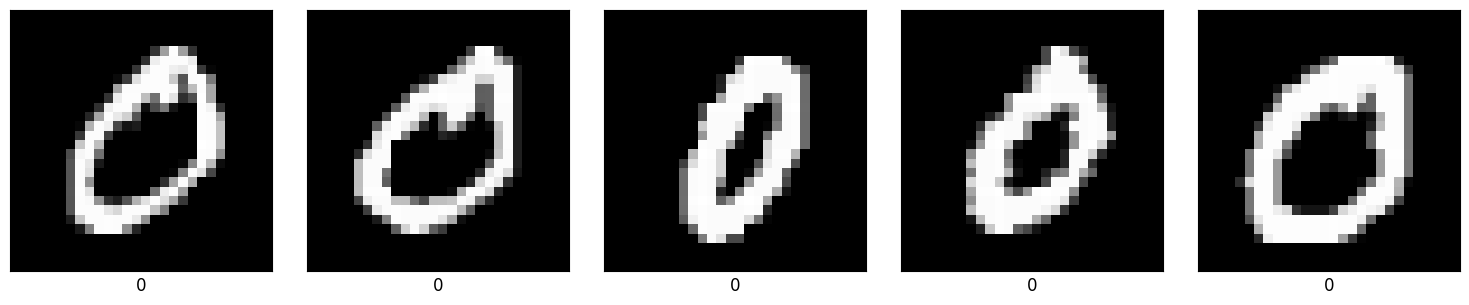

In [47]:
# Plot sample '0' images
zero_indices = np.where(train_labels_binary == 0)[0]
print("Sample '0' Images:")
plot_sample_images(train_images_filtered[zero_indices], train_labels_binary[zero_indices], binary_class_names, num_samples=5)


Sample '1' Images:


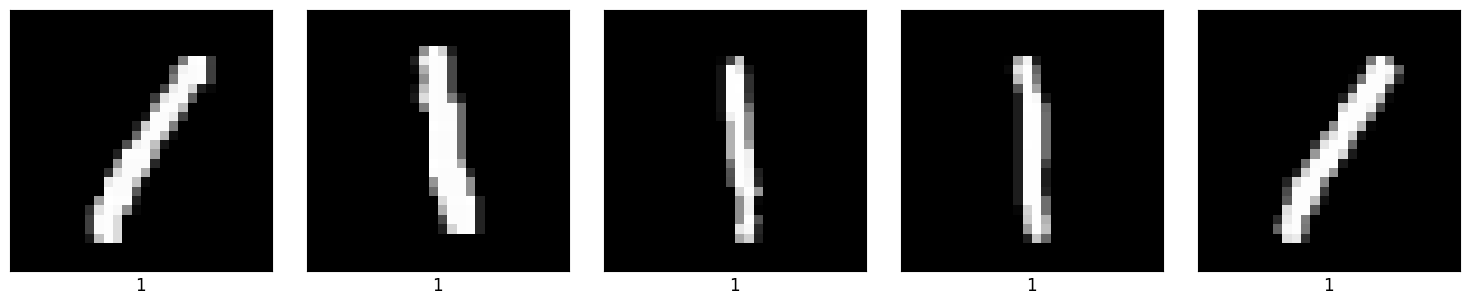

In [48]:
# Plot sample '1' images
one_indices = np.where(train_labels_binary == 1)[0]
print("Sample '1' Images:")
plot_sample_images(train_images_filtered[one_indices], train_labels_binary[one_indices], binary_class_names, num_samples=5)


### Step 3: Preprocess the Data

In [49]:

# Reshape the images to add a channel dimension
train_images_filtered = train_images_filtered.reshape((train_images_filtered.shape[0], 28, 28, 1))
test_images_filtered = test_images_filtered.reshape((test_images_filtered.shape[0], 28, 28, 1))

# Normalize pixel values to [0, 1] range (already done, but ensure it's float32)
train_images_filtered = train_images_filtered.astype('float32') / 255.0
test_images_filtered = test_images_filtered.astype('float32') / 255.0

print(f"Reshaped Training data shape: {train_images_filtered.shape}")
print(f"Reshaped Testing data shape: {test_images_filtered.shape}")


Reshaped Training data shape: (12665, 28, 28, 1)
Reshaped Testing data shape: (2115, 28, 28, 1)


### Step 4: Creating the Models

In [50]:
def create_cnn_model(activation_function='relu'):
    """
    Creates a simple CNN model with one convolutional layer, one pooling layer,
    and one fully connected layer.

    Args:
        activation_function (str): Activation function to use ('relu' or 'swish').

    Returns:
        tf.keras.Model: Compiled CNN model.
    """
    model = models.Sequential()

    # Convolutional Layer
    model.add(layers.Conv2D(32, (3,3), activation=activation_function,
                            input_shape=(28, 28, 1)))

    # Pooling Layer
    model.add(layers.MaxPooling2D((2,2)))

    # Flatten Layer
    model.add(layers.Flatten())

    # Fully Connected Layer
    model.add(layers.Dense(64, activation=activation_function))

    # Output Layer
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification

    return model


In [51]:
# Create two models: one with ReLU and another with Swish
model_relu = create_cnn_model(activation_function='relu')
model_swish = create_cnn_model(activation_function='swish')

# Display model summaries
print("Model with ReLU Activation:")
model_relu.summary()

print("\nModel with Swish Activation:")
model_swish.summary()


Model with ReLU Activation:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         346,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 346,561 (1.32 MB)

 Trainable params: 346,561 (1.32 MB)

 Non-trainable params: 0 (0.00 B)


Model with Swish Activation:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         346,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 346,561 (1.32 MB)

 Trainable params: 346,561 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

### Step 5: Compiling the Models

In [52]:
# Compile the ReLU model
model_relu.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Compile the Swish model
model_swish.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])


### Step 6: Training the Models


In [53]:
# Train the ReLU model
history_relu = model_relu.fit(train_images_filtered, train_labels_binary, epochs=10,
                              validation_data=(test_images_filtered, test_labels_binary))


Epoch 1/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9832 - loss: 0.0516 - val_accuracy: 0.9986 - val_loss: 0.0024
Epoch 2/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9967 - val_loss: 0.0075
Epoch 3/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9994 - loss: 0.0014 - val_accuracy: 0.9995 - val_loss: 0.0016
Epoch 4/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9996 - loss: 9.8493e-04 - val_accuracy: 0.9991 - val_loss: 0.0016
Epoch 5/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9998 - loss: 4.2962e-04 - val_accuracy: 0.9995 - val_loss: 0.0015
Epoch 6/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 1.0000 - loss: 2.0159e-04 - val_accuracy: 0.9991 - val_loss: 0.0014
Epoch 7/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 1.0000 - loss: 6.0239e-05 - val_accuracy: 0.9991 - val_loss: 0.0017
Epoch 8/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 1.0000 - lo

In [54]:
# Train the Swish model
history_swish = model_swish.fit(train_images_filtered, train_labels_binary, epochs=10,
                                validation_data=(test_images_filtered, test_labels_binary))


Epoch 1/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9897 - loss: 0.0565 - val_accuracy: 0.9986 - val_loss: 0.0040
Epoch 2/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9989 - loss: 0.0046 - val_accuracy: 0.9991 - val_loss: 0.0020
Epoch 3/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9994 - loss: 0.0016 - val_accuracy: 0.9986 - val_loss: 0.0027
Epoch 4/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9989 - loss: 0.0033 - val_accuracy: 0.9995 - val_loss: 0.0024
Epoch 5/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9997 - loss: 6.7620e-04 - val_accuracy: 0.9991 - val_loss: 0.0038
Epoch 6/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9991 - loss: 0.0015 - val_accuracy: 0.9995 - val_loss: 0.0022
Epoch 7/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 1.0000 - loss: 1.2717e-04 - val_accuracy: 0.9986 - val_loss: 0.0024
Epoch 8/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 1.0000 - loss: 3.

### Step 7: Visualizing Training History

In [55]:
# Define a function to plot training history
def plot_history(history, title):
    """
    Plots training and validation accuracy and loss.

    Args:
        history (tf.keras.callbacks.History): History object from model training.
        title (str): Title for the plots.
    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 4))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
    plt.legend(loc='lower right')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss', marker='o')
    plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
    plt.legend(loc='upper right')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


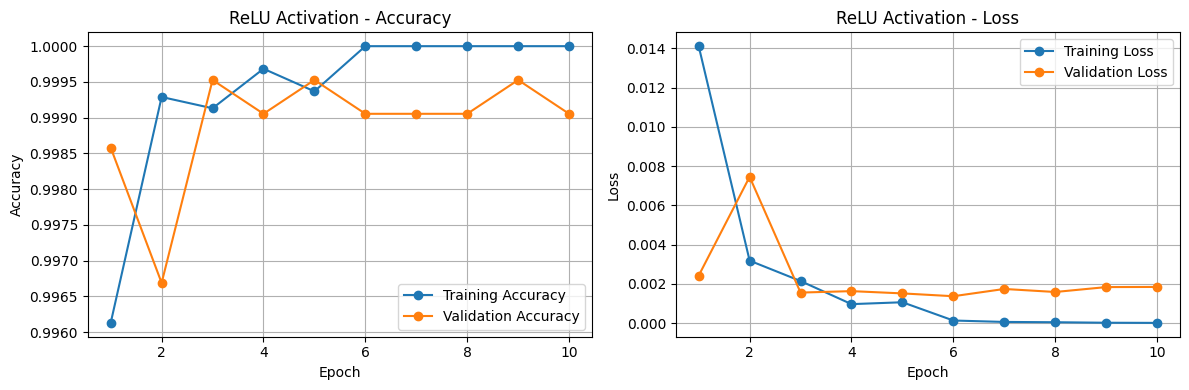

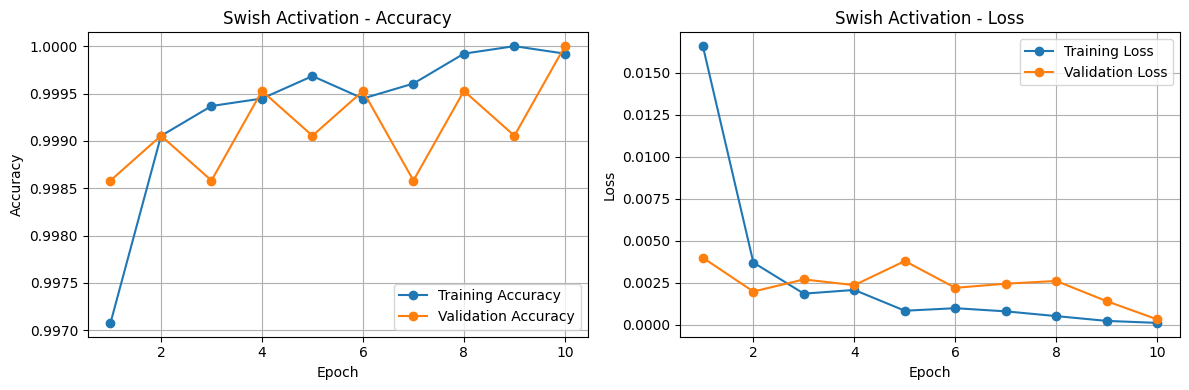

In [56]:
# Plot histories
plot_history(history_relu, 'ReLU Activation')
plot_history(history_swish, 'Swish Activation')


### Step 8: Evaluating the Models

In [57]:
# Evaluate the ReLU model
test_loss_relu, test_acc_relu = model_relu.evaluate(test_images_filtered, test_labels_binary, verbose=2)
print(f"\nReLU Model Test Accuracy: {test_acc_relu:.4f}")

# Evaluate the Swish model
test_loss_swish, test_acc_swish = model_swish.evaluate(test_images_filtered, test_labels_binary, verbose=2)
print(f"Swish Model Test Accuracy: {test_acc_swish:.4f}")


67/67 - 0s - 5ms/step - accuracy: 0.9991 - loss: 0.0018

ReLU Model Test Accuracy: 0.9991
67/67 - 0s - 7ms/step - accuracy: 1.0000 - loss: 3.2052e-04
Swish Model Test Accuracy: 1.0000


### Step 9: Comparing the Results

In [58]:
# Create a comparison table
data = {
    'Activation Function': ['ReLU', 'Swish'],
    'Test Accuracy': [test_acc_relu, test_acc_swish],
    'Test Loss': [test_loss_relu, test_loss_swish]
}

df = pd.DataFrame(data)


In [59]:
df

,Activation Function,Test Accuracy,Test Loss
0,ReLU,0.999054,0.001846
1,Swish,1.000000,0.000321


## **Discussion Questions**

So far, we have learned how different kernels help us extract various features from images. However, it's essential to consider other factors that can influence the performance and effectiveness of our Convolutional Neural Networks (CNNs). Here are some questions to ponder:

1. **Luminosity:**
   - How does varying brightness in images affect feature extraction and model accuracy?
   - What preprocessing techniques can mitigate issues arising from inconsistent luminosity?

2. **Transparency:**
   - In what ways does image transparency impact convolution operations?
   - How can CNNs handle images with transparent or semi-transparent regions effectively?

3. **Reflection:**
   - How do reflections in images influence the detection of features?
   - What strategies can be employed to reduce the impact of reflections on model performance?

4. **Color Similarity:**
   - How can a model distinguish between the white of a wall and the white of a bag or car?
   - What role does color differentiation play in enhancing classification accuracy?

5. **Texture Variations:**
   - How do different textures within the same color category affect feature extraction?
   - What techniques can CNNs use to differentiate between similar textures?

6. **Occlusions:**
   - How does partial obstruction of objects in images influence CNN performance?
   - What methods can be implemented to improve model robustness against occlusions?

7. **Scale and Rotation:**
   - How do changes in the scale and rotation of objects within images affect classification?
   - What data augmentation techniques can help CNNs become invariant to scale and rotation?

8. **Noise and Artifacts:**
   - How does image noise impact feature extraction and model predictions?
   - What preprocessing steps can be taken to minimize the effect of noise?

9. **Background Clutter:**
   - In images with complex backgrounds, how can CNNs focus on relevant features?
   - What approaches can be used to reduce the influence of background clutter on model performance?

10. **Lighting Conditions:**
    - How do different lighting conditions (e.g., shadows, highlights) affect the appearance of features?
    - What normalization techniques can address variations in lighting across the dataset?

Reflecting on these questions will deepen your understanding of the complexities involved in image classification and the challenges that arise beyond basic feature extraction. Consider experimenting with different techniques to address these factors and observe their effects on your model's performance.

---
